## Import Modules and Download Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passangers-booking-data/AirlineScrappedReview.csv
/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv")
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Here are some brief summaries of the data

In [4]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [6]:
status_summary = data[['trip_type']].groupby(data["booking_complete"]).aggregate('count')
status_summary

,trip_type
booking_complete,
0,42523
1,7479


In [7]:
passenger_data = data.groupby(["booking_complete","sales_channel"]).agg({"num_passengers":"sum"})
passenger_data 

num_passengers
booking_complete sales_channel                
0                Internet                59359
                 Mobile                   7868
1                Internet                11304
                 Mobile                   1035

### We can see that around 85% of bookings are incomplete

In [8]:
data_drop_na = data.dropna()
data_drop_na

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [9]:
data["origin"] = data["route"].str[:3]
data["destination"] = data["route"].str[3:]
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,AKL,HGH
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


In [10]:
text_columns = ['sales_channel','trip_type','flight_day','route','booking_origin',"origin","destination"]
for each in text_columns:
    summary_data = data.groupby([each,"booking_complete"]).agg({"trip_type":"count"})  
    print(summary_data)

                                trip_type
sales_channel booking_complete           
Internet      0                     37513
              1                      6870
Mobile        0                      5010
              1                       609
                             trip_type
trip_type  booking_complete           
CircleTrip 0                       112
           1                         5
OneWay     0                       367
           1                        20
RoundTrip  0                     42044
           1                      7454
                             trip_type
flight_day booking_complete           
Fri        0                      5778
           1                       983
Mon        0                      6898
           1                      1204
Sat        0                      4951
           1                       861
Sun        0                      5627
           1                       927
Thu        0                      6302
       

### Again, regardless of the partition columns (sale channel, trip type, destination, etc), most of bookings are not completed.

### So I decide to use only these numeric columns to training model.

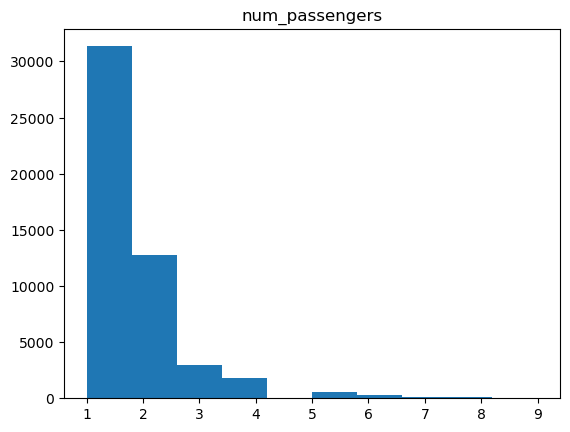

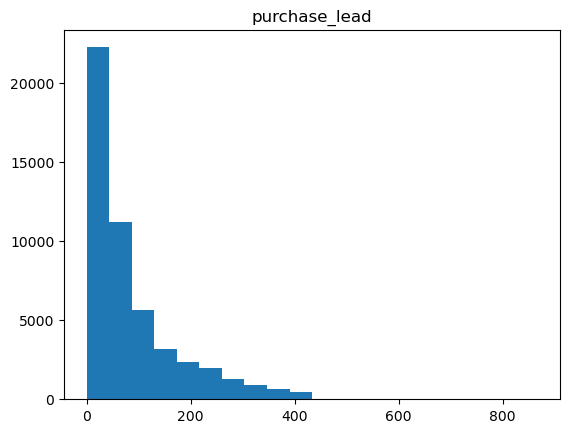

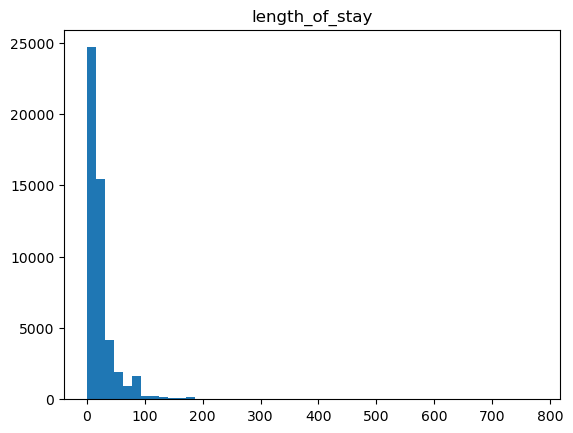

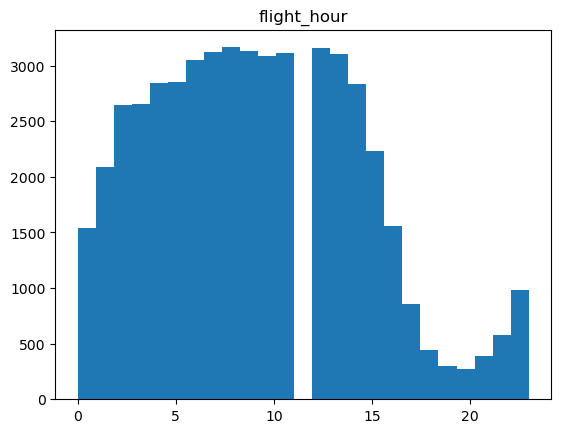

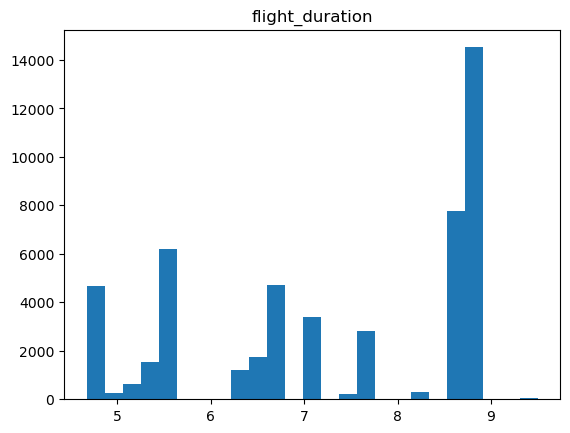

In [11]:
numeric_columns_a = ['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_duration']
numeric_columns_b = ["wants_extra_baggage","wants_preferred_seat","wants_in_flight_meals"]
bins = [10,20,50,25,25]
numeric_columns = numeric_columns_a + numeric_columns_b
for each,bin_num in zip(numeric_columns_a,bins):
    plt.hist(data[each], bins=bin_num)
    plt.title(each)
    plt.show()

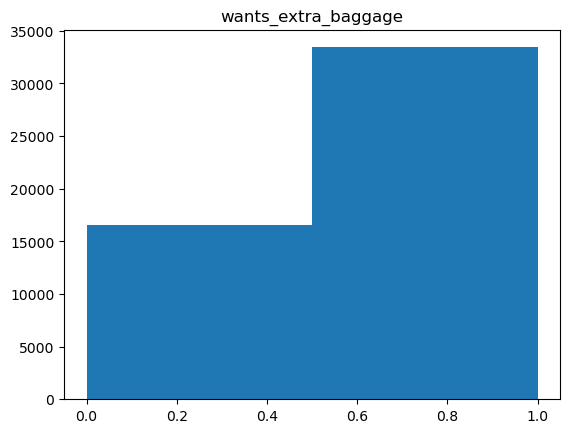

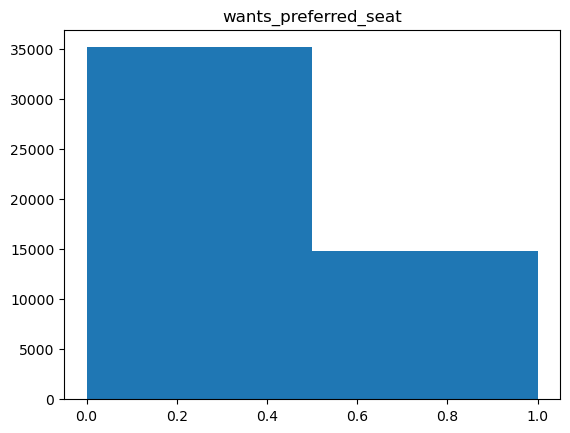

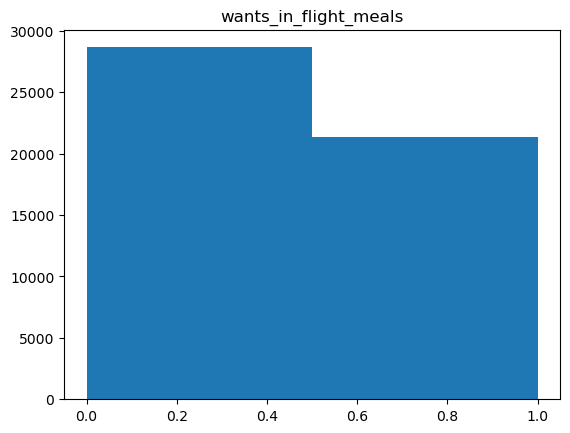

In [12]:
for each in numeric_columns_b:
    plt.hist(data[each], bins=2)
    plt.title(each)
    plt.show()

In [13]:
corr = data[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
num_passengers,1.000000,0.212628,-0.115825,0.015613,-0.063198,0.120434,0.028593,0.022984
purchase_lead,0.212628,1.000000,-0.076544,0.035980,0.067847,-0.022175,-0.004466,-0.022622
length_of_stay,-0.115825,-0.076544,1.000000,-0.024869,0.141164,0.176770,0.032287,0.098846
flight_hour,0.015613,0.035980,-0.024869,1.000000,-0.002101,-0.011417,0.012177,0.013023
flight_duration,-0.063198,0.067847,0.141164,-0.002101,1.000000,0.057037,0.101249,0.154280
wants_extra_baggage,0.120434,-0.022175,0.176770,-0.011417,0.057037,1.000000,0.207698,0.216501
wants_preferred_seat,0.028593,-0.004466,0.032287,0.012177,0.101249,0.207698,1.000000,0.315120
wants_in_flight_meals,0.022984,-0.022622,0.098846,0.013023,0.154280,0.216501,0.315120,1.000000


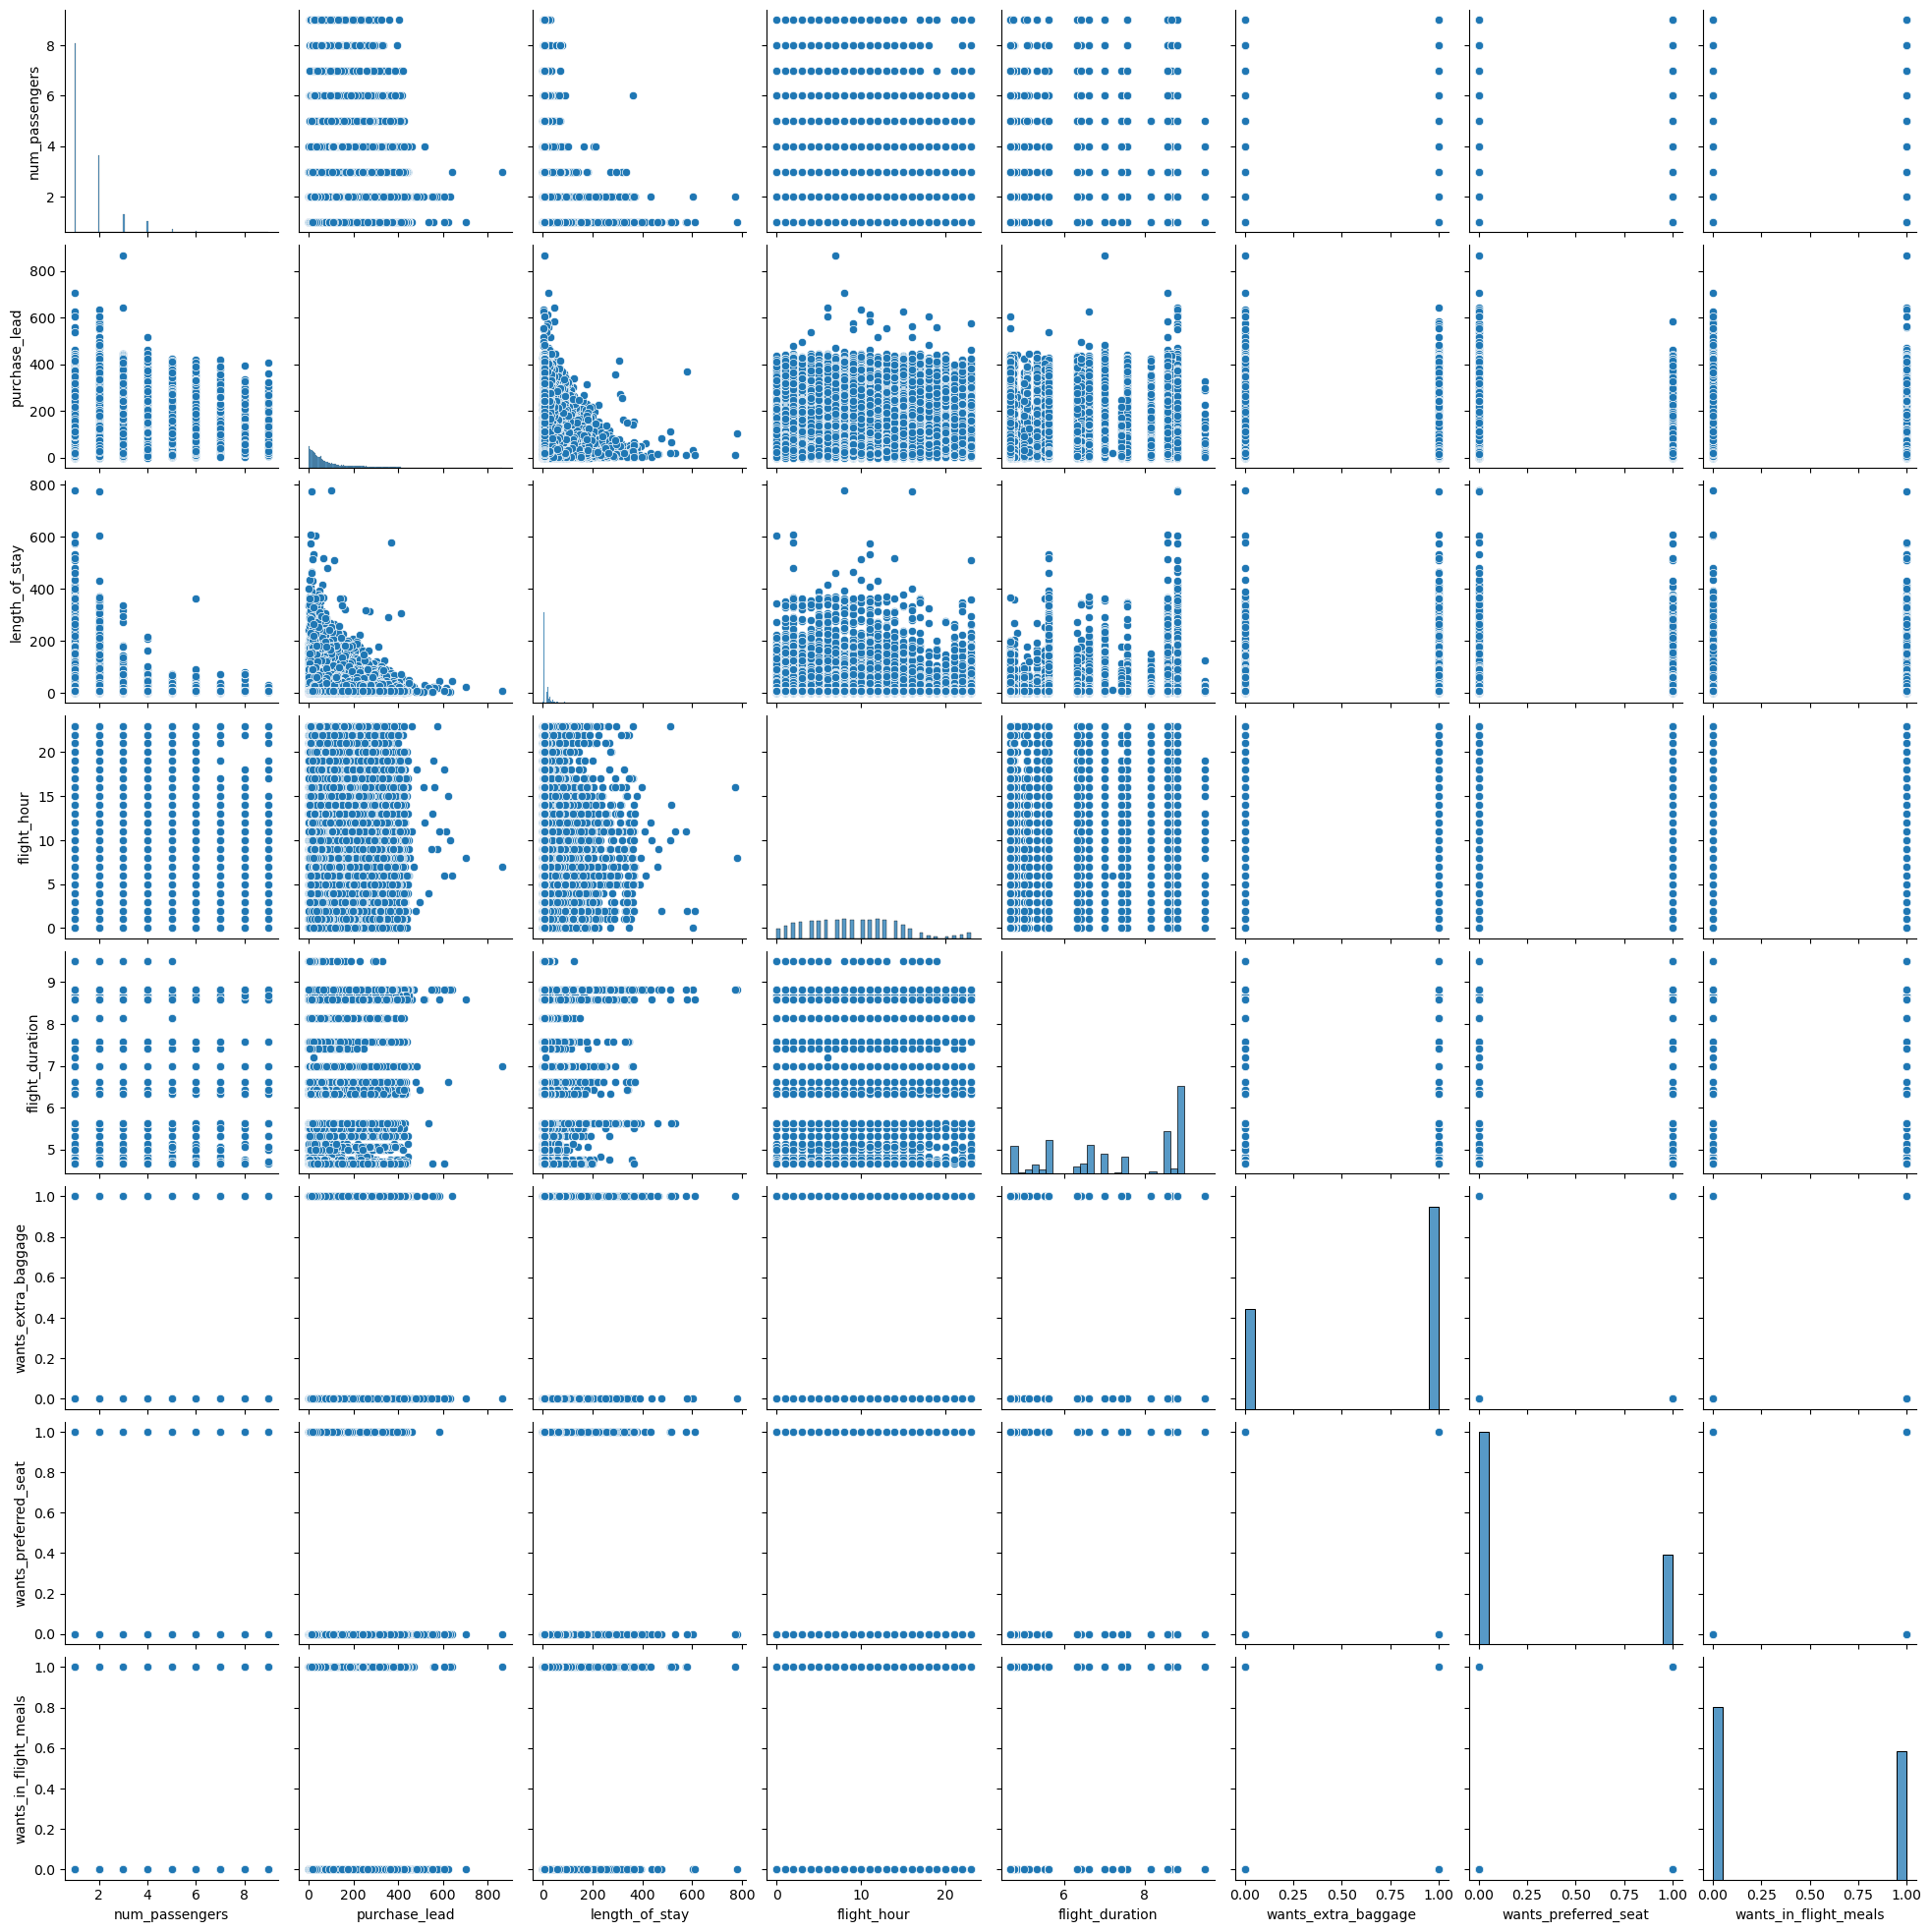

In [14]:
sns.pairplot(data[numeric_columns])

### We can see that these 8 columns are quite weakly related

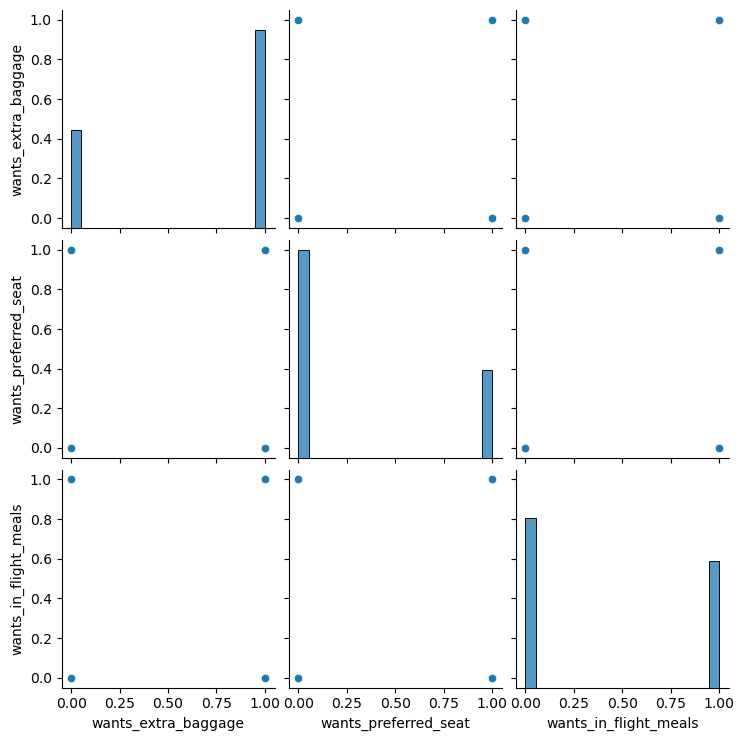

In [15]:
sns.pairplot(data[numeric_columns_b])

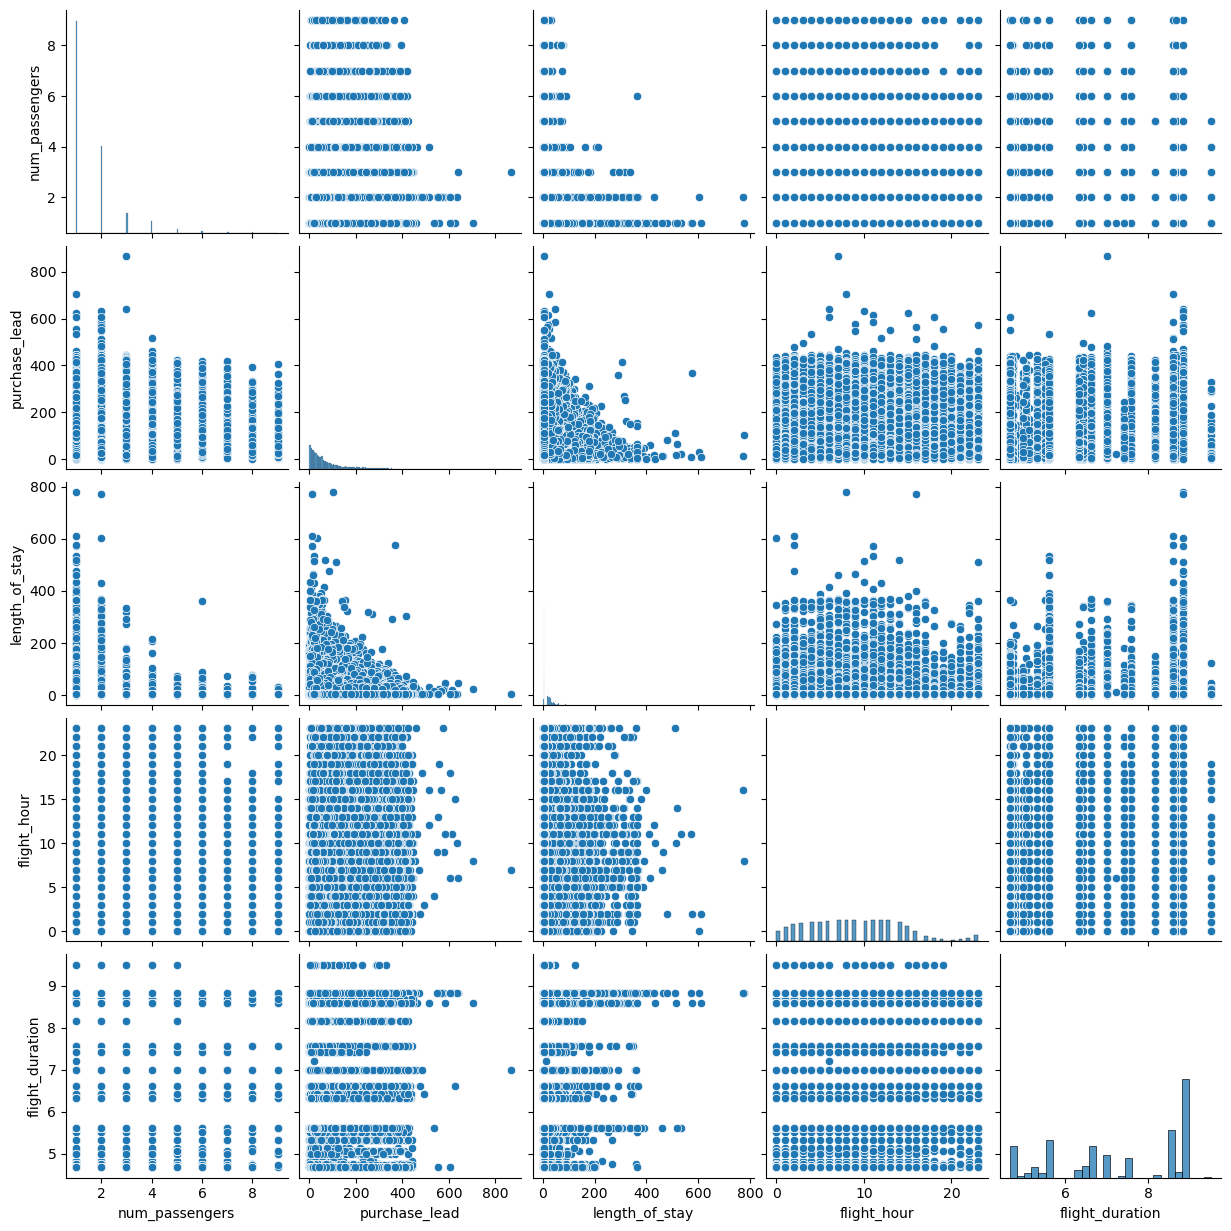

In [16]:
sns.pairplot(data[numeric_columns_a])

In [17]:
length_of_stay_summary = data["length_of_stay"].describe()
length_of_stay_summary

count    50002.000000
mean        23.044778
std         33.887171
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

### Take a look for outliers in length of stay

In [18]:
upper_length_stay = length_of_stay_summary["75%"] + 1.5 * (length_of_stay_summary["75%"] - length_of_stay_summary["25%"])
lower_length_stay = length_of_stay_summary["25%"] - 1.5 * (length_of_stay_summary["75%"] - length_of_stay_summary["25%"])
print(upper_length_stay, lower_length_stay)

62.5 -29.5


In [19]:
outliers = data[(data["length_of_stay"] > upper_length_stay) | (data["length_of_stay"] < lower_length_stay)]
outliers

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
19,1,Internet,RoundTrip,67,155,8,Sun,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
22,1,Internet,RoundTrip,21,88,9,Wed,AKLICN,South Korea,1,0,1,6.62,0,AKL,ICN
32,2,Internet,RoundTrip,7,82,4,Thu,AKLICN,South Korea,1,0,1,6.62,0,AKL,ICN
42,1,Internet,RoundTrip,71,90,7,Thu,AKLICN,South Korea,1,1,1,6.62,0,AKL,ICN
44,1,Internet,RoundTrip,9,84,7,Wed,AKLICN,New Zealand,1,0,0,6.62,0,AKL,ICN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25582,1,Internet,RoundTrip,129,63,15,Fri,TRZWUH,Taiwan,1,0,1,5.13,0,TRZ,WUH
25583,1,Internet,RoundTrip,127,67,8,Sun,TRZWUH,China,1,0,1,5.13,0,TRZ,WUH
25584,1,Internet,RoundTrip,127,67,8,Sun,TRZWUH,China,1,0,1,5.13,0,TRZ,WUH
25588,1,Internet,RoundTrip,129,63,17,Fri,TRZWUH,Taiwan,1,0,1,5.13,0,TRZ,WUH


In [20]:
booking = data[data["booking_complete"] == 1]
no_booking = data[data["booking_complete"] == 0]

In [21]:
booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,AKL,HGH
84,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1,AKL,KUL
88,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1,AKL,KUL
96,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1,AKL,KUL
111,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1,AKL,KUL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49974,1,Internet,RoundTrip,33,6,6,Wed,PENTPE,Taiwan,1,1,0,4.67,1,PEN,TPE
49979,2,Internet,RoundTrip,15,6,16,Tue,PENTPE,Malaysia,1,1,1,4.67,1,PEN,TPE
49982,4,Internet,RoundTrip,242,6,9,Tue,PENXIY,Malaysia,1,0,1,5.00,1,PEN,XIY
49986,2,Internet,RoundTrip,7,6,4,Wed,PERPNH,Australia,0,0,0,5.62,1,PER,PNH


In [22]:
no_booking

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


### I decide to do the upsampling for booking because of huge difference of booking and no booking

In [23]:
booking_upsample = resample(booking,
             replace=True,
             n_samples=len(no_booking),
             random_state=42)
booking_upsample

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
49302,1,Internet,RoundTrip,14,6,9,Wed,OOLPEN,Australia,1,1,1,8.83,1,OOL,PEN
6545,1,Internet,RoundTrip,7,83,13,Tue,COKOOL,India,1,0,0,8.83,1,COK,OOL
39975,1,Mobile,RoundTrip,39,5,12,Mon,KBVPVG,China,1,0,0,5.33,1,KBV,PVG
39119,2,Internet,RoundTrip,126,5,13,Mon,ICNLGK,South Korea,0,0,0,6.62,1,ICN,LGK
38997,1,Mobile,RoundTrip,5,5,6,Sat,ICNJHB,South Korea,0,0,1,6.62,1,ICN,JHB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49787,1,Internet,RoundTrip,23,6,13,Tue,PENTPE,Taiwan,1,0,0,4.67,1,PEN,TPE
35130,2,Internet,RoundTrip,131,5,7,Fri,BDOICN,Indonesia,1,1,0,6.62,1,BDO,ICN
26523,1,Internet,RoundTrip,15,3,3,Sun,BKICTU,China,0,1,0,4.72,1,BKI,CTU
16613,1,Internet,RoundTrip,26,32,5,Wed,KIXPEN,Malaysia,1,1,0,7.00,1,KIX,PEN


In [24]:
new_data = pd.concat([booking_upsample,no_booking])
new_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
49302,1,Internet,RoundTrip,14,6,9,Wed,OOLPEN,Australia,1,1,1,8.83,1,OOL,PEN
6545,1,Internet,RoundTrip,7,83,13,Tue,COKOOL,India,1,0,0,8.83,1,COK,OOL
39975,1,Mobile,RoundTrip,39,5,12,Mon,KBVPVG,China,1,0,0,5.33,1,KBV,PVG
39119,2,Internet,RoundTrip,126,5,13,Mon,ICNLGK,South Korea,0,0,0,6.62,1,ICN,LGK
38997,1,Mobile,RoundTrip,5,5,6,Sat,ICNJHB,South Korea,0,0,1,6.62,1,ICN,JHB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


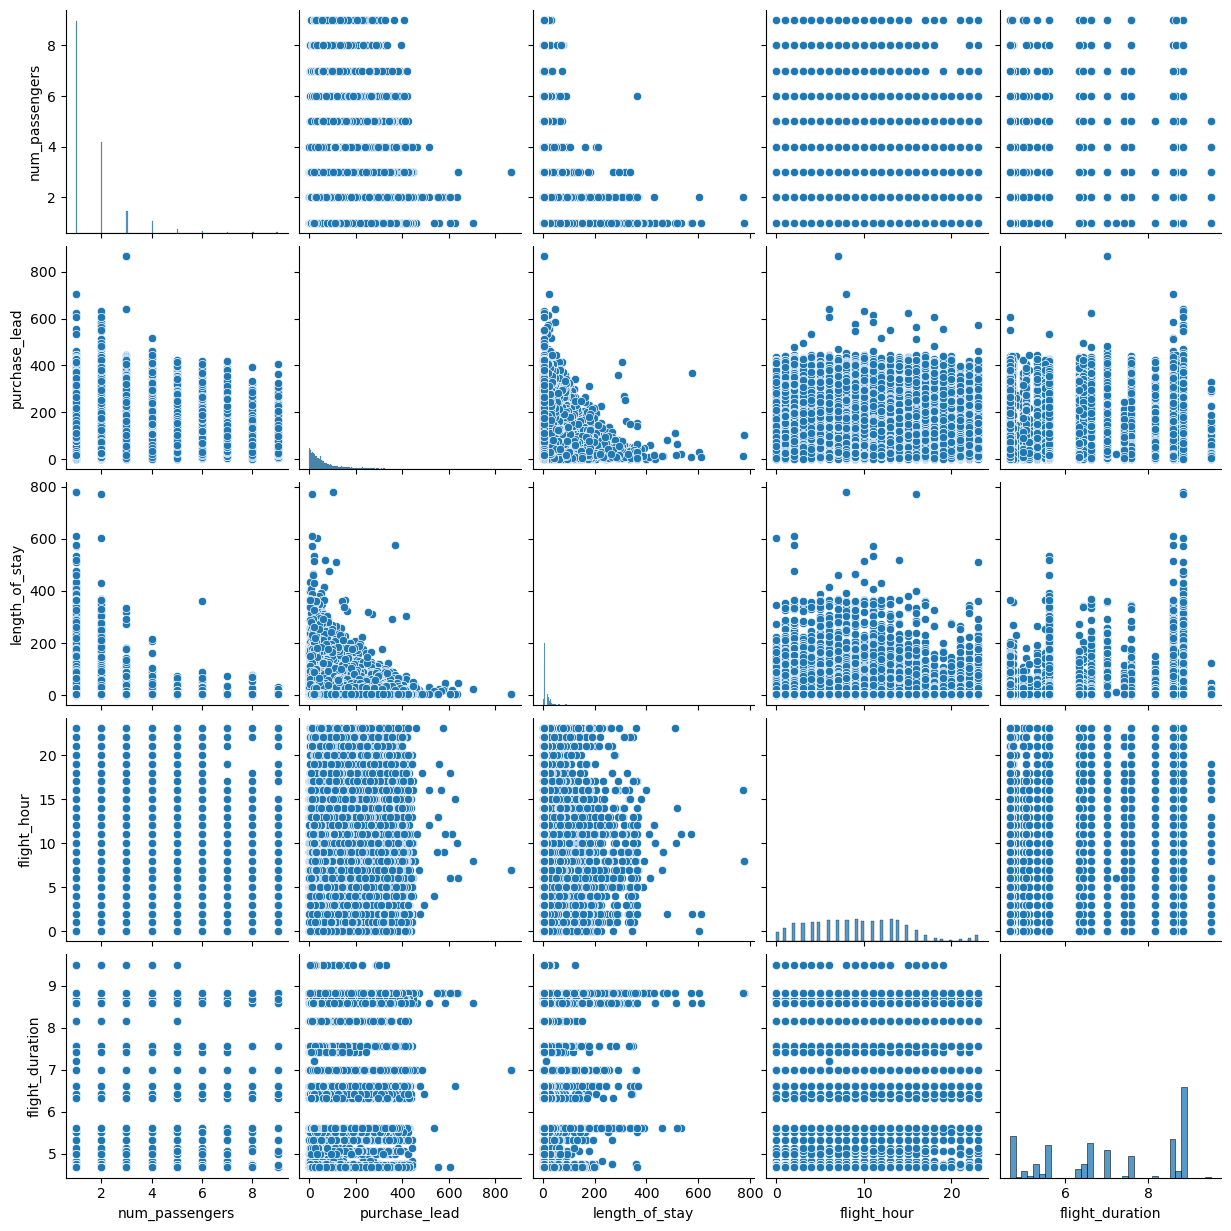

In [25]:
sns.pairplot(new_data[numeric_columns_a])

In [26]:
corr2 = data[numeric_columns].corr()
corr2.style.background_gradient(cmap='coolwarm')

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
num_passengers,1.000000,0.212628,-0.115825,0.015613,-0.063198,0.120434,0.028593,0.022984
purchase_lead,0.212628,1.000000,-0.076544,0.035980,0.067847,-0.022175,-0.004466,-0.022622
length_of_stay,-0.115825,-0.076544,1.000000,-0.024869,0.141164,0.176770,0.032287,0.098846
flight_hour,0.015613,0.035980,-0.024869,1.000000,-0.002101,-0.011417,0.012177,0.013023
flight_duration,-0.063198,0.067847,0.141164,-0.002101,1.000000,0.057037,0.101249,0.154280
wants_extra_baggage,0.120434,-0.022175,0.176770,-0.011417,0.057037,1.000000,0.207698,0.216501
wants_preferred_seat,0.028593,-0.004466,0.032287,0.012177,0.101249,0.207698,1.000000,0.315120
wants_in_flight_meals,0.022984,-0.022622,0.098846,0.013023,0.154280,0.216501,0.315120,1.000000


### Standardize the numeric columns that I would use for training

In [27]:
new_data[numeric_columns] = (new_data[numeric_columns] - new_data[numeric_columns].mean()) / new_data[numeric_columns].std()
new_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
49302,-0.591939,Internet,RoundTrip,-0.761237,-0.461957,-0.025677,Wed,OOLPEN,Australia,0.656230,1.462894,1.129607,1.123729,1,OOL,PEN
6545,-0.591939,Internet,RoundTrip,-0.838935,1.817114,0.721483,Tue,COKOOL,India,0.656230,-0.683569,-0.885253,1.123729,1,COK,OOL
39975,-0.591939,Mobile,RoundTrip,-0.483748,-0.491555,0.534693,Mon,KBVPVG,China,0.656230,-0.683569,-0.885253,-1.173360,1,KBV,PVG
39119,0.371656,Internet,RoundTrip,0.481917,-0.491555,0.721483,Mon,ICNLGK,South Korea,-1.523838,-0.683569,-0.885253,-0.326719,1,ICN,LGK
38997,-0.591939,Mobile,RoundTrip,-0.861134,-0.491555,-0.586048,Sat,ICNJHB,South Korea,-1.523838,-0.683569,1.129607,-0.326719,1,ICN,JHB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,0.371656,Internet,RoundTrip,-0.616943,-0.461957,-0.025677,Sat,PERPNH,Australia,0.656230,-0.683569,1.129607,-0.983030,0,PER,PNH
49998,-0.591939,Internet,RoundTrip,0.315423,-0.461957,-0.959628,Sun,PERPNH,Australia,-1.523838,-0.683569,-0.885253,-0.983030,0,PER,PNH
49999,-0.591939,Internet,RoundTrip,-0.650241,-0.461957,2.402594,Sat,PERPNH,Australia,-1.523838,-0.683569,1.129607,-0.983030,0,PER,PNH
50000,-0.591939,Internet,RoundTrip,-0.750138,-0.461957,0.347903,Mon,PERPNH,Australia,0.656230,-0.683569,1.129607,-0.983030,0,PER,PNH


In [28]:
features = new_data[numeric_columns]
target = new_data[["booking_complete"]]
features

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
49302,-0.591939,-0.761237,-0.461957,-0.025677,1.123729,0.656230,1.462894,1.129607
6545,-0.591939,-0.838935,1.817114,0.721483,1.123729,0.656230,-0.683569,-0.885253
39975,-0.591939,-0.483748,-0.491555,0.534693,-1.173360,0.656230,-0.683569,-0.885253
39119,0.371656,0.481917,-0.491555,0.721483,-0.326719,-1.523838,-0.683569,-0.885253
38997,-0.591939,-0.861134,-0.491555,-0.586048,-0.326719,-1.523838,-0.683569,1.129607
...,...,...,...,...,...,...,...,...
49997,0.371656,-0.616943,-0.461957,-0.025677,-0.983030,0.656230,-0.683569,1.129607
49998,-0.591939,0.315423,-0.461957,-0.959628,-0.983030,-1.523838,-0.683569,-0.885253
49999,-0.591939,-0.650241,-0.461957,2.402594,-0.983030,-1.523838,-0.683569,1.129607
50000,-0.591939,-0.750138,-0.461957,0.347903,-0.983030,0.656230,-0.683569,1.129607


In [29]:
target

,booking_complete
49302,1
6545,1
39975,1
39119,1
38997,1
...,...
49997,0
49998,0
49999,0
50000,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75)

## Try KNN for k value of 1-9 and check the performance for both training and testing datasets

In [31]:
for i in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    print("Testing for k="+str(i),classification_report(y_test, y_pred_test))  

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=1               precision    recall  f1-score   support

           0       0.98      0.83      0.90     10587
           1       0.85      0.98      0.91     10675

    accuracy                           0.91     21262
   macro avg       0.92      0.91      0.91     21262
weighted avg       0.92      0.91      0.91     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=2               precision    recall  f1-score   support

           0       0.93      0.84      0.88     10587
           1       0.85      0.94      0.89     10675

    accuracy                           0.89     21262
   macro avg       0.89      0.89      0.89     21262
weighted avg       0.89      0.89      0.89     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=3               precision    recall  f1-score   support

           0       0.93      0.71      0.81     10587
           1       0.77      0.95      0.85     10675

    accuracy                           0.83     21262
   macro avg       0.85      0.83      0.83     21262
weighted avg       0.85      0.83      0.83     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=4               precision    recall  f1-score   support

           0       0.86      0.74      0.79     10587
           1       0.77      0.88      0.82     10675

    accuracy                           0.81     21262
   macro avg       0.81      0.81      0.81     21262
weighted avg       0.81      0.81      0.81     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=5               precision    recall  f1-score   support

           0       0.86      0.63      0.73     10587
           1       0.71      0.90      0.80     10675

    accuracy                           0.77     21262
   macro avg       0.79      0.77      0.76     21262
weighted avg       0.79      0.77      0.76     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=6               precision    recall  f1-score   support

           0       0.79      0.68      0.73     10587
           1       0.72      0.82      0.77     10675

    accuracy                           0.75     21262
   macro avg       0.75      0.75      0.75     21262
weighted avg       0.75      0.75      0.75     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=7               precision    recall  f1-score   support

           0       0.80      0.60      0.68     10587
           1       0.68      0.86      0.76     10675

    accuracy                           0.73     21262
   macro avg       0.74      0.73      0.72     21262
weighted avg       0.74      0.73      0.72     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=8               precision    recall  f1-score   support

           0       0.74      0.65      0.69     10587
           1       0.69      0.77      0.73     10675

    accuracy                           0.71     21262
   macro avg       0.72      0.71      0.71     21262
weighted avg       0.72      0.71      0.71     21262



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Testing for k=9               precision    recall  f1-score   support

           0       0.76      0.59      0.67     10587
           1       0.67      0.82      0.74     10675

    accuracy                           0.71     21262
   macro avg       0.72      0.71      0.70     21262
weighted avg       0.72      0.71      0.70     21262



In [32]:
for i in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    y_pred_train = knn_model.predict(X_train)
    print("Training for k="+str(i),classification_report(y_train, y_pred_train))  

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=1               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31936
           1       1.00      1.00      1.00     31848

    accuracy                           1.00     63784
   macro avg       1.00      1.00      1.00     63784
weighted avg       1.00      1.00      1.00     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=2               precision    recall  f1-score   support

           0       0.99      1.00      0.99     31936
           1       1.00      0.99      0.99     31848

    accuracy                           0.99     63784
   macro avg       0.99      0.99      0.99     63784
weighted avg       0.99      0.99      0.99     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=3               precision    recall  f1-score   support

           0       0.99      0.83      0.91     31936
           1       0.86      0.99      0.92     31848

    accuracy                           0.91     63784
   macro avg       0.92      0.91      0.91     63784
weighted avg       0.92      0.91      0.91     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=4               precision    recall  f1-score   support

           0       0.95      0.85      0.90     31936
           1       0.87      0.96      0.91     31848

    accuracy                           0.90     63784
   macro avg       0.91      0.91      0.90     63784
weighted avg       0.91      0.90      0.90     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=5               precision    recall  f1-score   support

           0       0.96      0.73      0.83     31936
           1       0.78      0.97      0.86     31848

    accuracy                           0.85     63784
   macro avg       0.87      0.85      0.85     63784
weighted avg       0.87      0.85      0.85     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=6               precision    recall  f1-score   support

           0       0.89      0.77      0.83     31936
           1       0.80      0.91      0.85     31848

    accuracy                           0.84     63784
   macro avg       0.85      0.84      0.84     63784
weighted avg       0.85      0.84      0.84     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=7               precision    recall  f1-score   support

           0       0.90      0.68      0.78     31936
           1       0.74      0.93      0.83     31848

    accuracy                           0.80     63784
   macro avg       0.82      0.80      0.80     63784
weighted avg       0.82      0.80      0.80     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=8               precision    recall  f1-score   support

           0       0.84      0.73      0.78     31936
           1       0.76      0.86      0.81     31848

    accuracy                           0.79     63784
   macro avg       0.80      0.79      0.79     63784
weighted avg       0.80      0.79      0.79     63784



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training for k=9               precision    recall  f1-score   support

           0       0.85      0.66      0.74     31936
           1       0.72      0.89      0.79     31848

    accuracy                           0.77     63784
   macro avg       0.79      0.77      0.77     63784
weighted avg       0.79      0.77      0.77     63784



### Results are generally perfect

### Let's try SVC

In [33]:
svc = SVC()
svc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [34]:
svc_y_pred_train = svc.predict(X_train)
print(classification_report(y_train, svc_y_pred_train))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64     31936
           1       0.64      0.62      0.63     31848

    accuracy                           0.63     63784
   macro avg       0.63      0.63      0.63     63784
weighted avg       0.63      0.63      0.63     63784



In [35]:
svc_y_pred_test = svc.predict(X_test)
print(classification_report(y_test, svc_y_pred_test))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64     10587
           1       0.64      0.62      0.63     10675

    accuracy                           0.63     21262
   macro avg       0.63      0.63      0.63     21262
weighted avg       0.63      0.63      0.63     21262



### Seems fine

### Finally, let's try Decision Tree

In [36]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

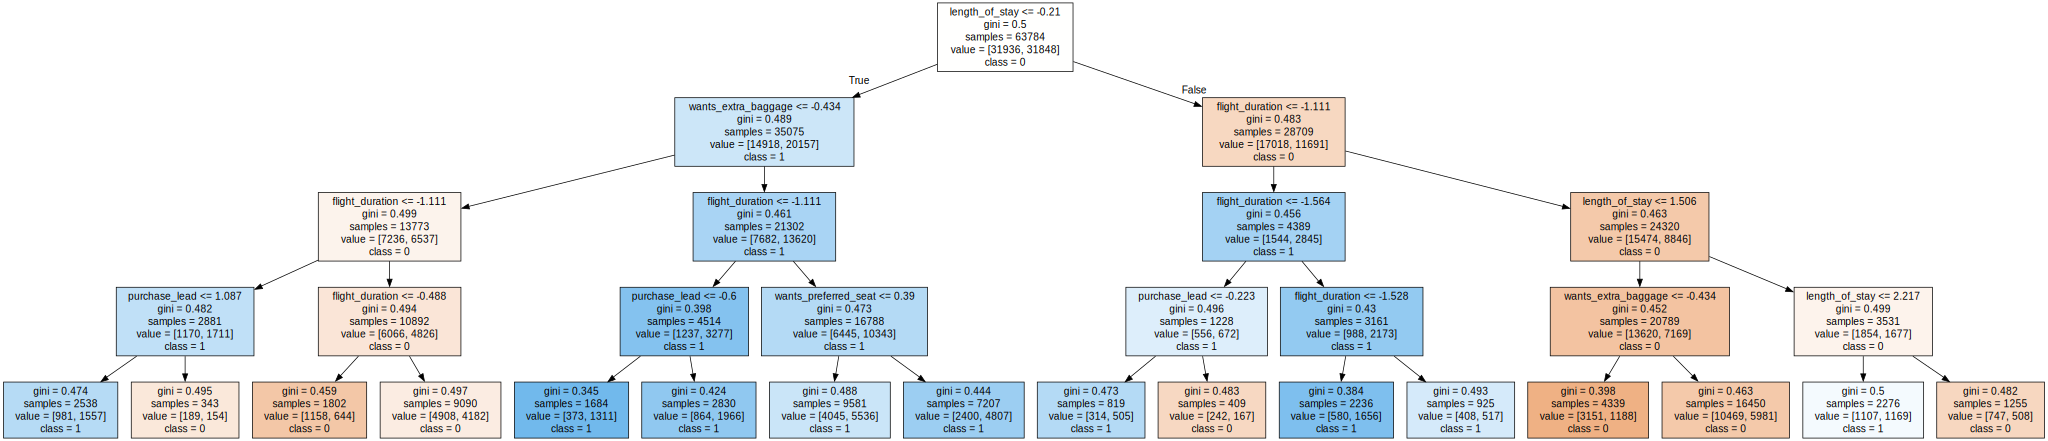

In [37]:
# DOT data
dot_data = tree.export_graphviz(dtc, out_file=None, 
                                feature_names=list(X_train.columns),  
                                class_names=[str(i) for i in list(set(y_train["booking_complete"]))],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [38]:
dtc_y_test_pred = dtc.predict(X_test)
print(classification_report(y_test, dtc_y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64     10587
           1       0.64      0.61      0.62     10675

    accuracy                           0.63     21262
   macro avg       0.63      0.63      0.63     21262
weighted avg       0.63      0.63      0.63     21262



### Conclusion: KNN is the best in this case